In [1]:
import dgl

def build_karate_club_graph():
    g = dgl.DGLGraph()
    # add 34 nodes into the graph; nodes are labeled from 0~33
    g.add_nodes(34)
    # all 78 edges as a list of tuples
    edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
        (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
        (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
        (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
        (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
        (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
        (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
        (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
        (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
        (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
        (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
        (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
        (33, 31), (33, 32)]
    # add edges two lists of nodes: src and dst
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    # edges are directional in DGL; make them bi-directional
    g.add_edges(dst, src)
    
    return g

Using backend: pytorch


In [2]:
G = build_karate_club_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 34 nodes.
We have 156 edges.


C:\ProgramData\Anaconda3\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


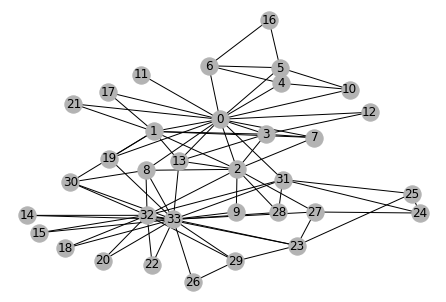

In [3]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = G.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [4]:
from deepwalk import DeepWalk
model = DeepWalk(G, 5, 2, 50, 10)

In [5]:
model.train()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
result = model.returnResult()
result

tensor([[ 0.6345, -0.4455],
        [ 0.7797, -0.5491],
        [ 0.4692,  0.0652],
        [ 0.6342, -0.6001],
        [-0.2375,  0.3124],
        [ 0.0349, -0.1667],
        [ 0.1109, -0.2568],
        [ 0.4436, -0.2841],
        [ 0.3650,  0.5648],
        [ 0.4394,  0.4992],
        [-0.0015, -0.0463],
        [ 0.3722, -0.1660],
        [ 0.4164, -0.3113],
        [ 0.1393,  0.2154],
        [ 0.8240,  0.8024],
        [ 0.6289,  0.7925],
        [-0.2113,  0.1638],
        [ 0.4248, -0.0585],
        [ 0.7913,  0.6601],
        [ 0.7637, -0.2643],
        [ 0.5913,  1.0186],
        [ 0.4742, -0.2396],
        [ 0.6399,  0.9561],
        [ 0.9413,  0.8932],
        [ 0.8339,  0.3891],
        [ 0.8950,  0.4212],
        [ 0.9525,  0.7023],
        [ 0.9564,  0.3165],
        [ 0.5925,  0.5505],
        [ 0.9503,  0.8851],
        [ 0.6244,  0.4457],
        [ 0.7804,  0.4786],
        [ 0.6612,  0.8931],
        [ 0.8460,  0.7635]])

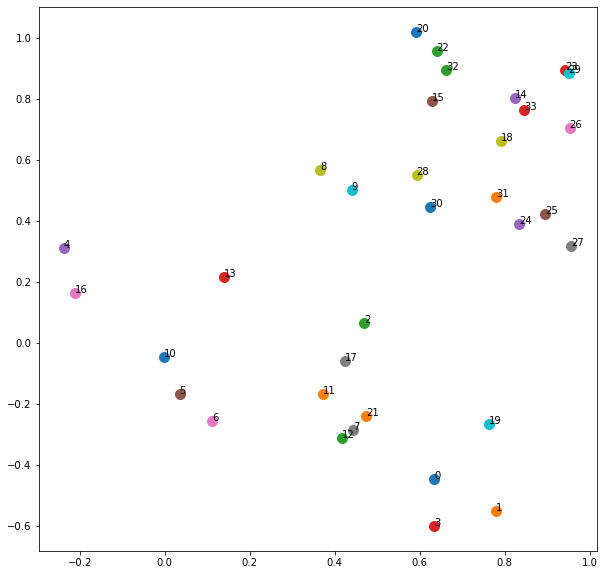

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
for i in range(len(result)):
    x, y = result[i][0].item(), result[i][1].item()
    plt.scatter(x, y, s= 100)
    plt.annotate(str(i), (x, y))

In [12]:
A.item()

1.0

In [6]:
19//2

9